In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
# Read Files
df = pd.read_excel('data.xlsx')

df.head()

# Separate the features (X) and target variable (y)
X = df.drop('DroppedOut', axis=1)
y = df['DroppedOut']
# Convert numpy arrays
y = np.array(y)
X_predictors = np.array(X)

# Perform z-score normalization on the features 
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)

In [8]:
# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)
svm = SVC(kernel='linear')

for train_index, test_index in skf.split(X_predictors, y):
    X_train, X_test = X_predictors[train_index], X_predictors[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the SVM classifier
    svm.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = svm.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[156  34]
 [ 20  59]]
Confusion matrix for fold 2:
 [[162  28]
 [ 26  53]]
Confusion matrix for fold 3:
 [[175  15]
 [ 19  60]]
Confusion matrix for fold 4:
 [[182   8]
 [ 30  49]]
Confusion matrix for fold 5:
 [[181  10]
 [ 23  55]]
Confusion matrix for fold 6:
 [[179  12]
 [ 25  53]]
Confusion matrix for fold 7:
 [[179  11]
 [ 21  57]]
Confusion matrix for fold 8:
 [[134  56]
 [ 15  63]]
Model Accuracy: 0.8357879515064085
Weighted Average Precision: 0.8436279257780658
Weighted Average Recall: 0.8357879515064085
Weighted Average F1-score: 0.835532178943891
Macro Average Precision: 0.7143703118831426
Macro Average Recall: 0.7564777327935223
Macro Average F1-score: 0.7150771903029214


In [9]:
# Get the coefficients of the SVM model
coefficients = svm.coef_[0]

# Get the absolute values of the coefficients
abs_coefficients = np.abs(coefficients)

# Sort the features based on their importance
sorted_indices = np.argsort(abs_coefficients)[::-1]

# Get the names of the features
feature_names = X.columns

# Get the names of the five significant features
significant_features = feature_names[sorted_indices[:10]]

print("Ten significant features:")
print(significant_features)

# Create a DataFrame with the feature names and coefficients
df_features = pd.DataFrame({
    'Feature': feature_names[sorted_indices],
    'Coefficient': coefficients[sorted_indices]
})

# Export the DataFrame to a CSV file
df_features.to_csv('feature_ranking.csv', index=False)

Ten significant features:
Index(['NumFailedWorkshops', 'NumWithdrawnWorkshops',
       'TotalNumEnrolledWorkshops', 'NumOfPendingSLActivities',
       'MHSpeechCommuication', 'NumPassedWorkshops',
       'PHDevelopmentalCoordination', 'ExcusedMasterlabSessionsCount',
       'NumPassedMasterlabs', 'MHNeurodevelopmental'],
      dtype='object')


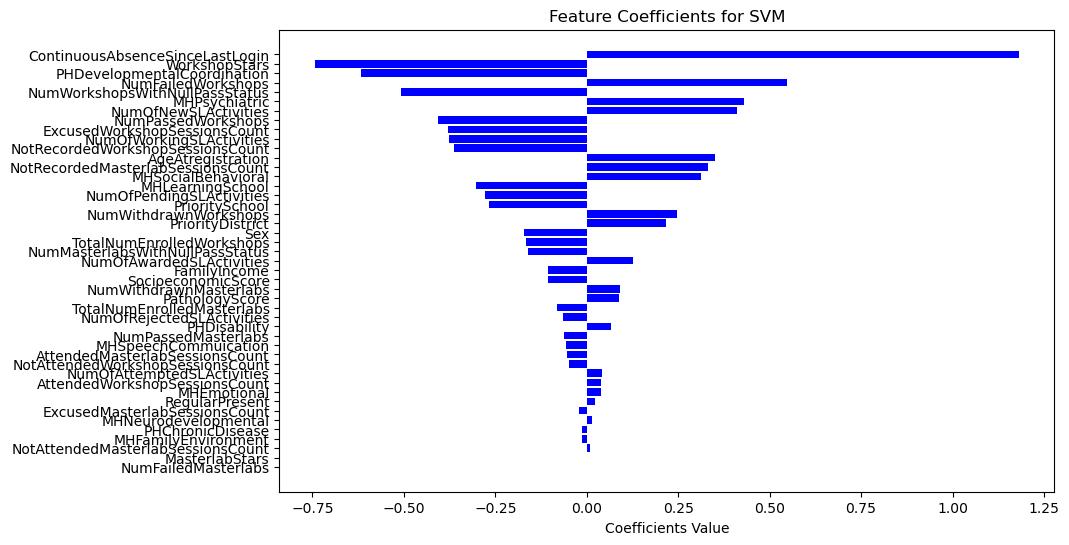

In [28]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Coefficients for SVM")
plt.barh(df_features['Feature'], df_features['Coefficient'], color='b', align='center')
plt.xlabel("Coefficients Value")
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('../visualizations/featureimp-svm.png', bbox_inches='tight')

plt.show()

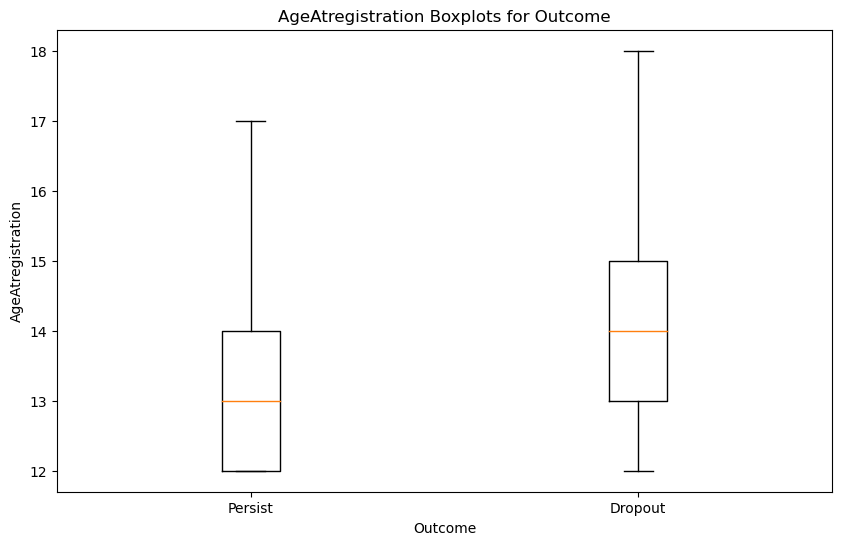

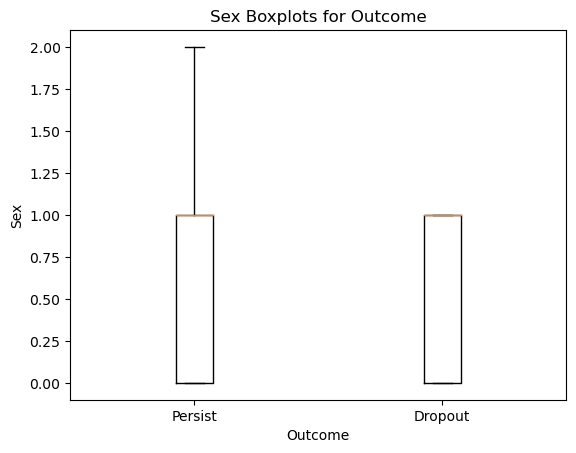

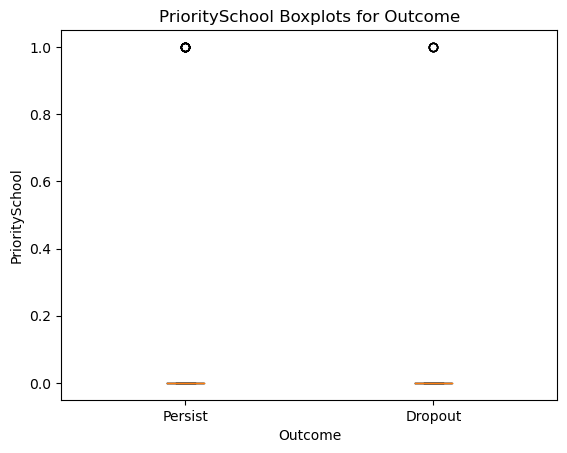

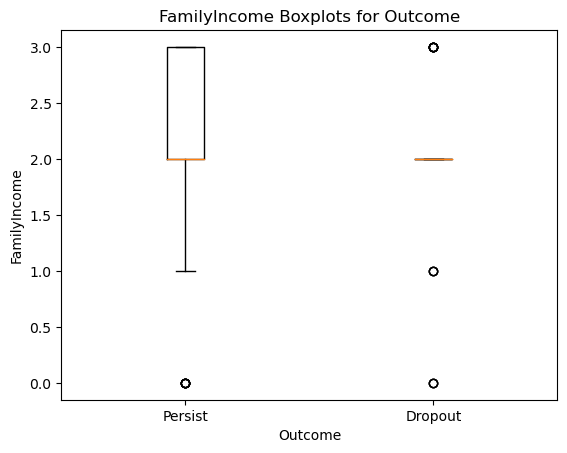

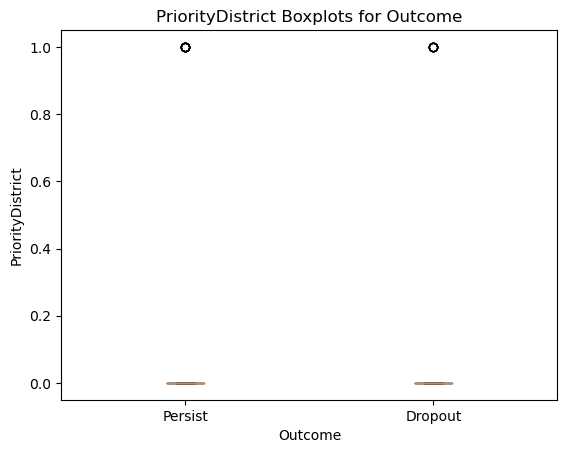

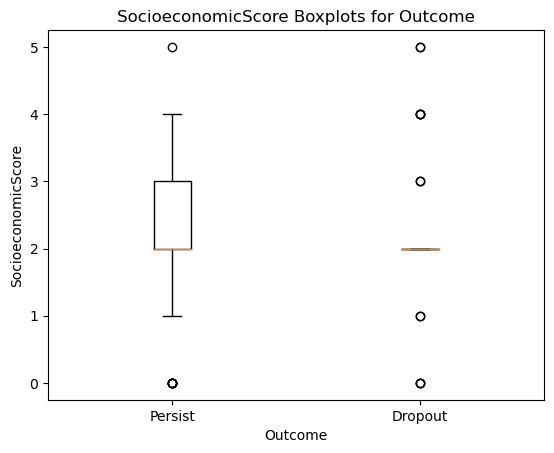

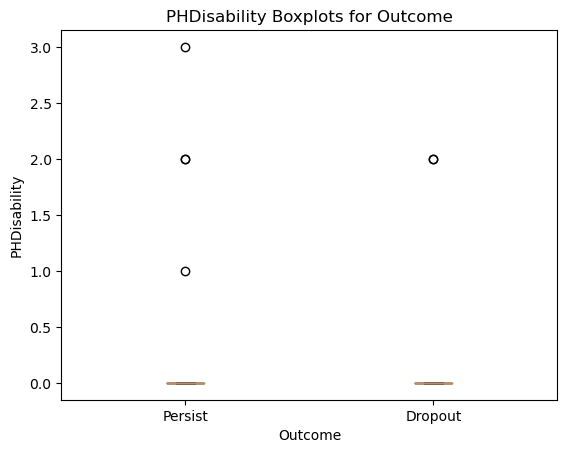

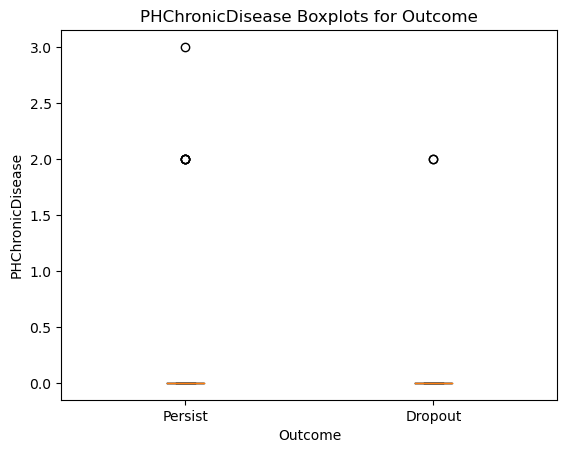

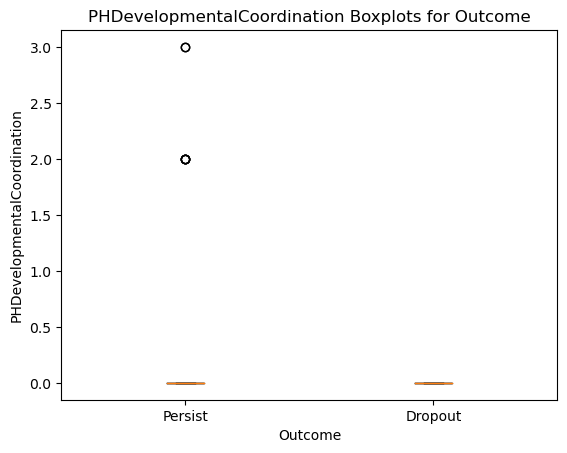

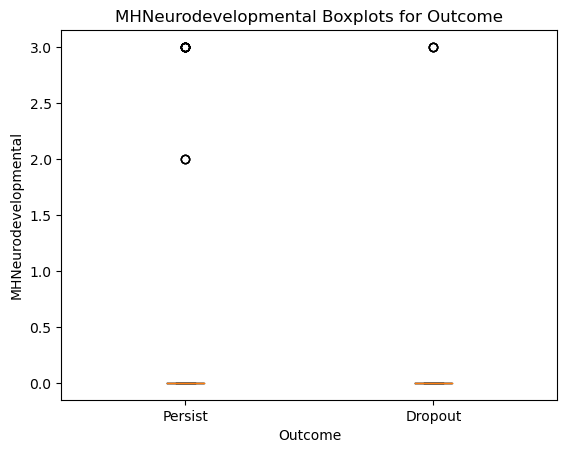

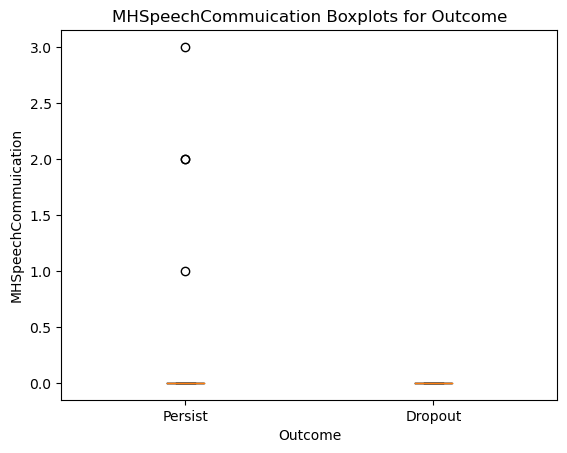

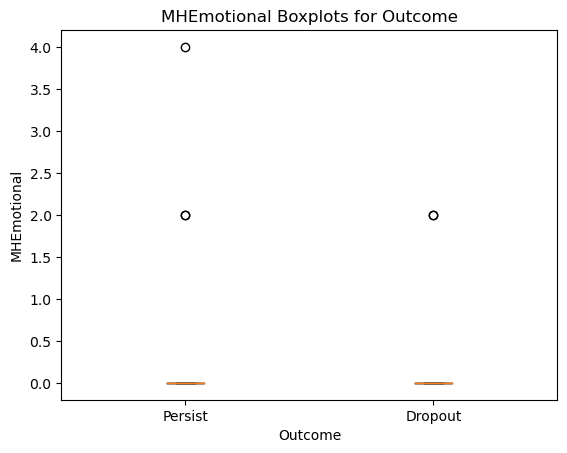

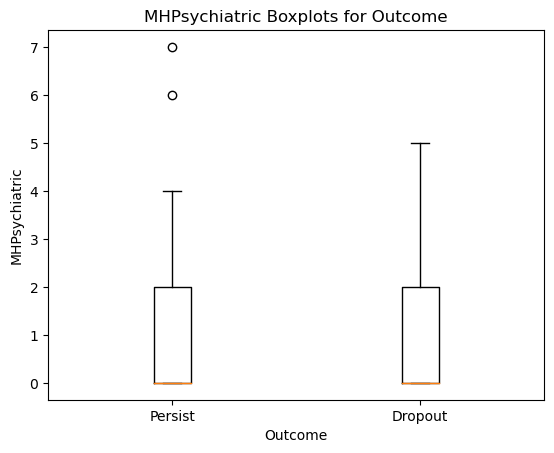

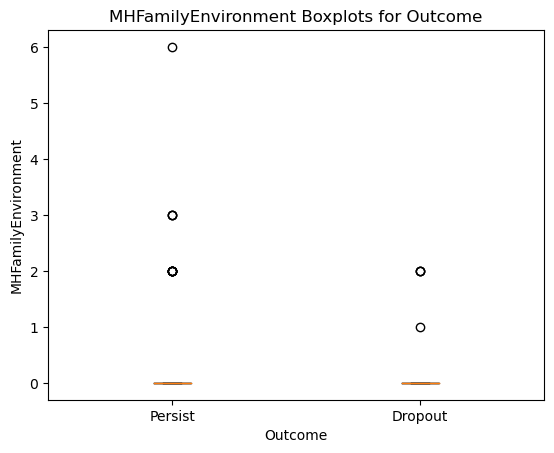

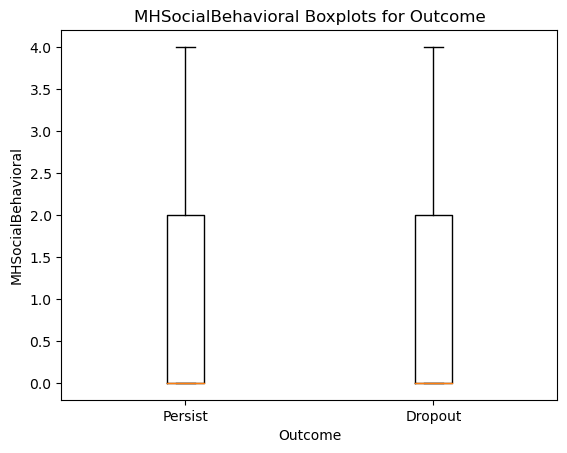

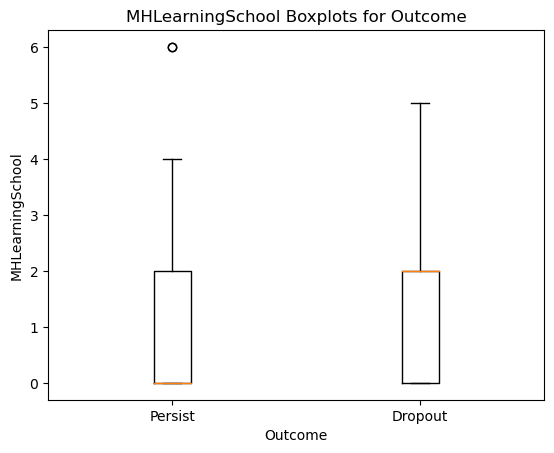

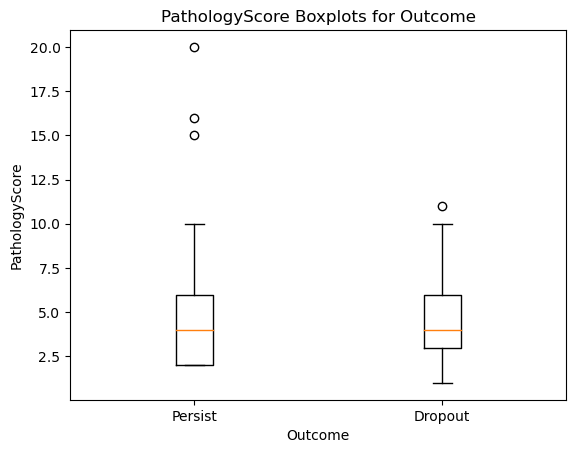

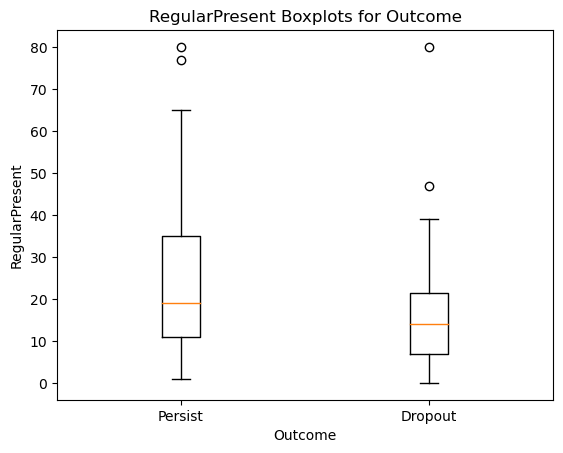

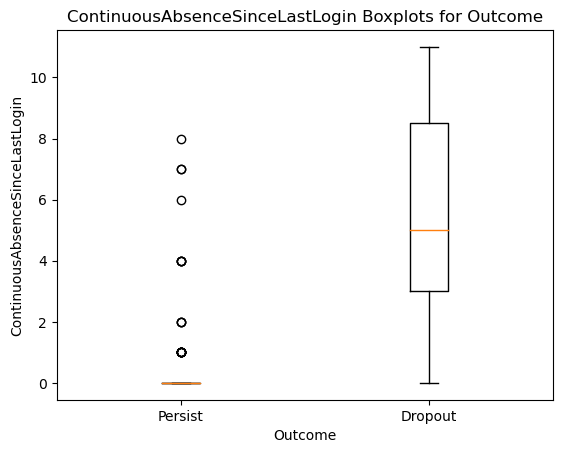

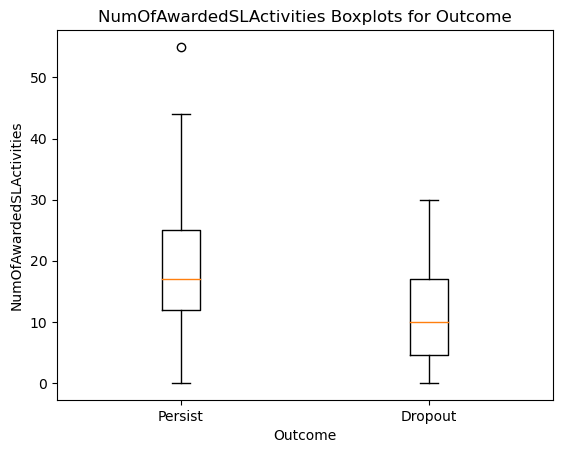

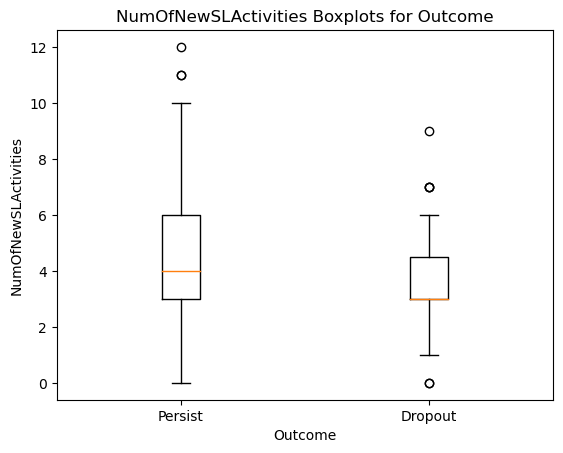

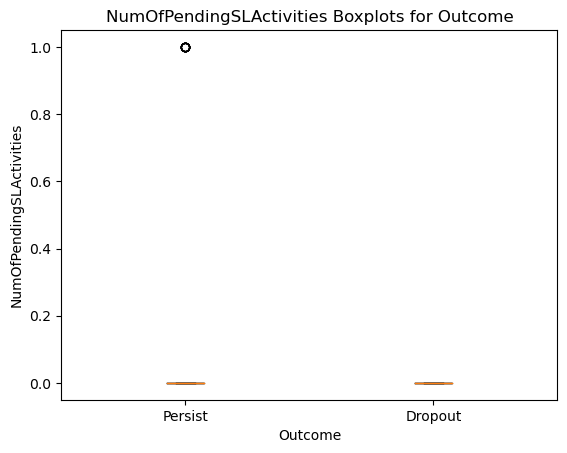

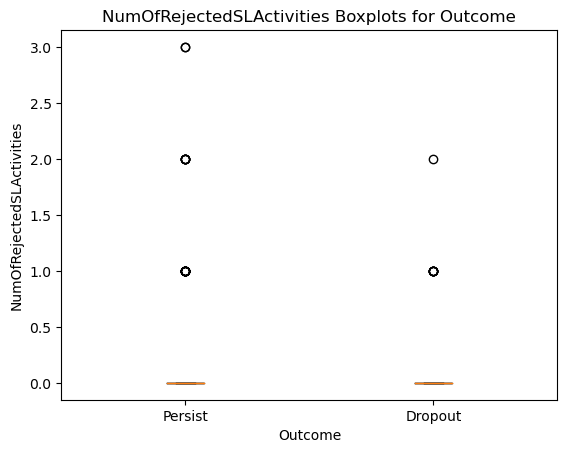

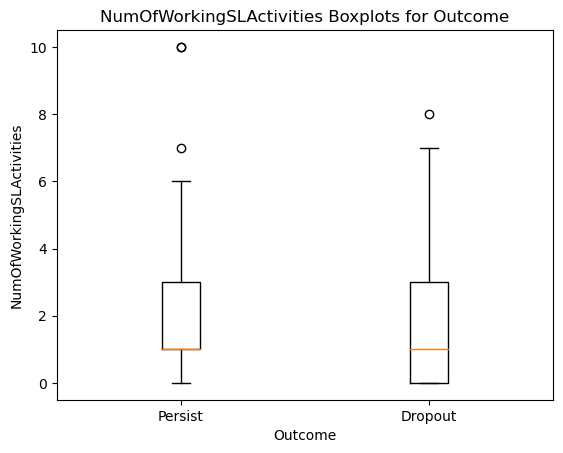

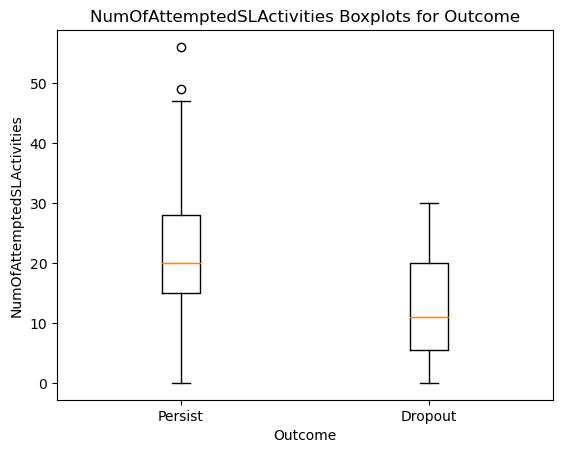

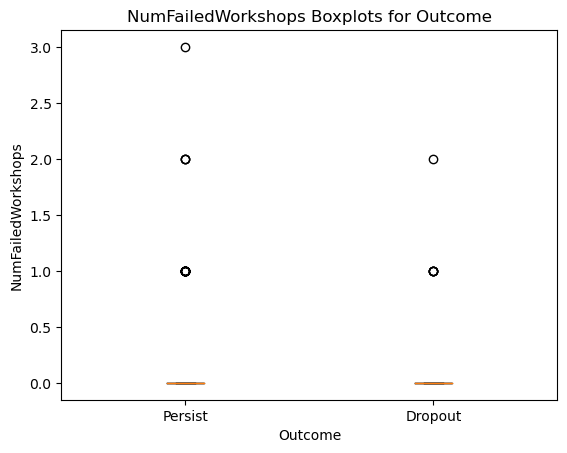

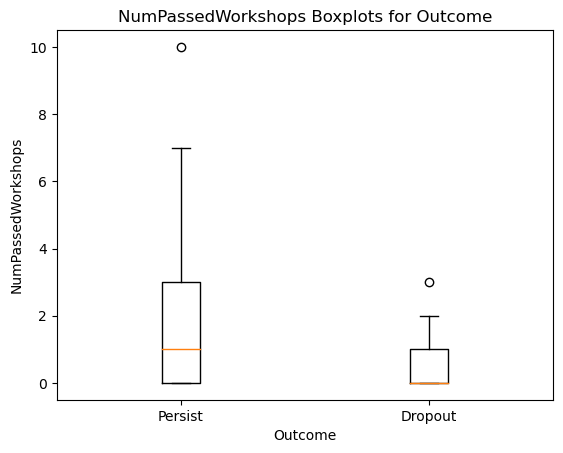

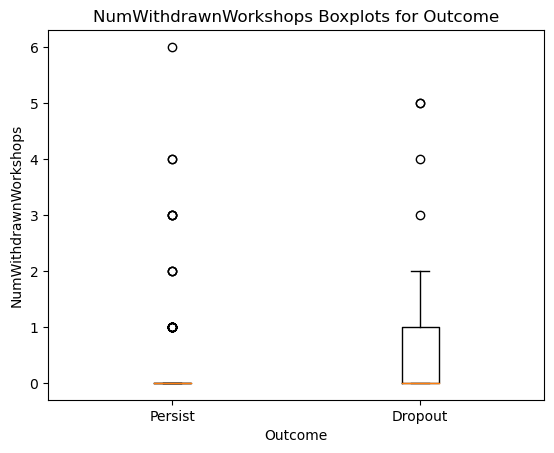

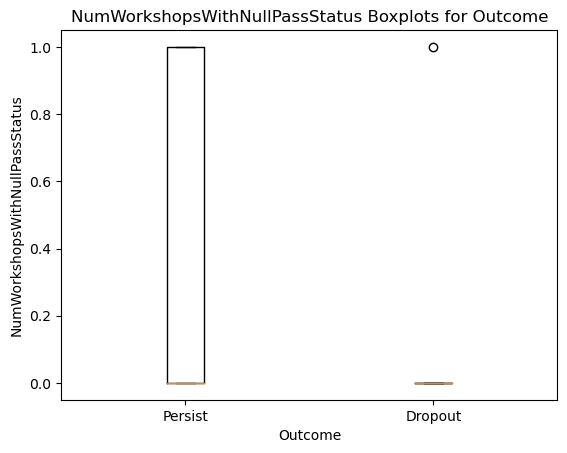

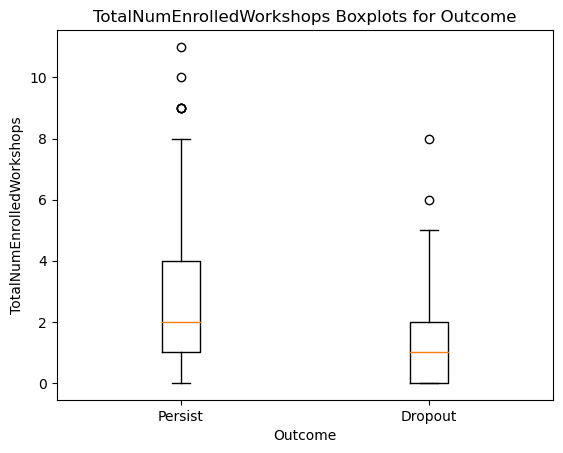

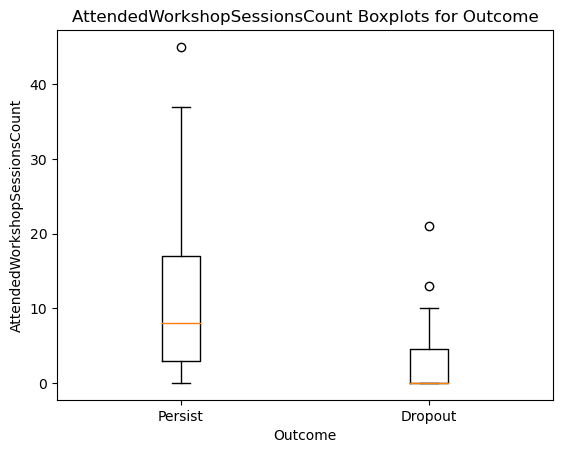

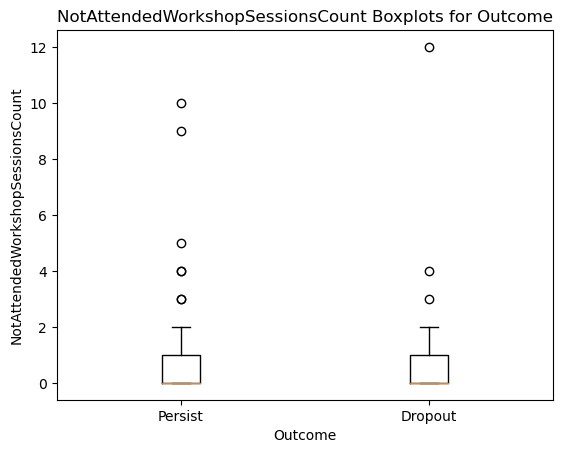

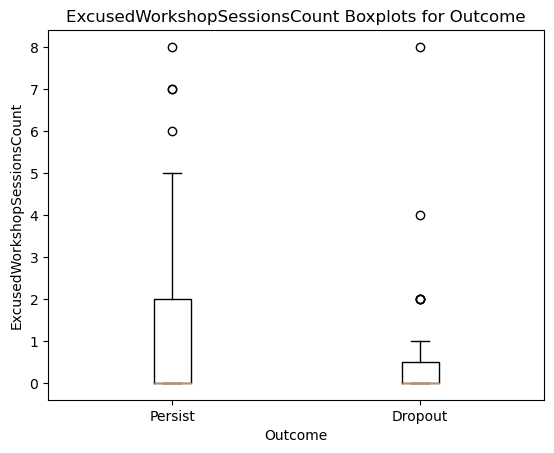

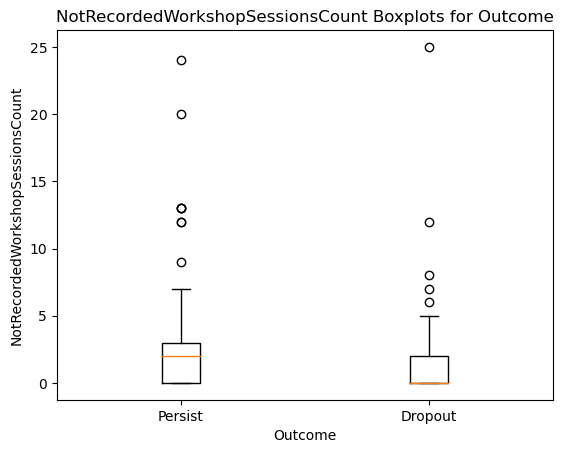

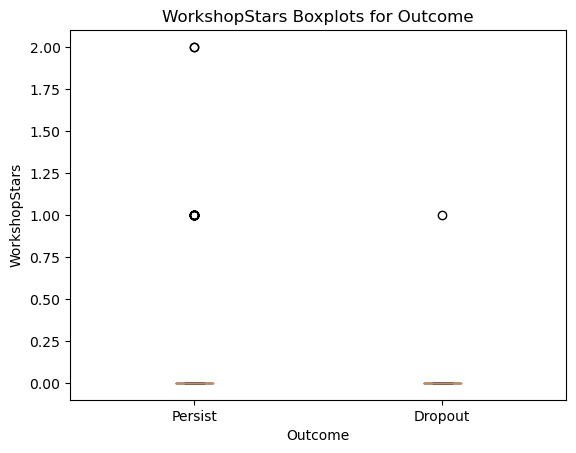

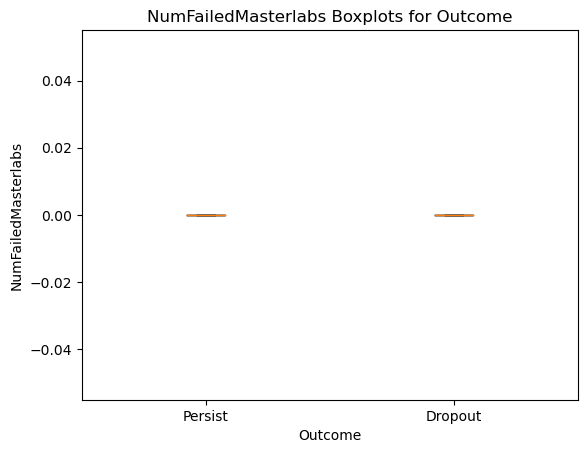

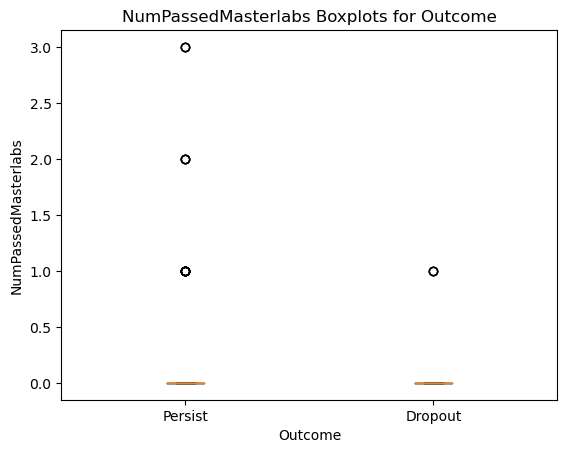

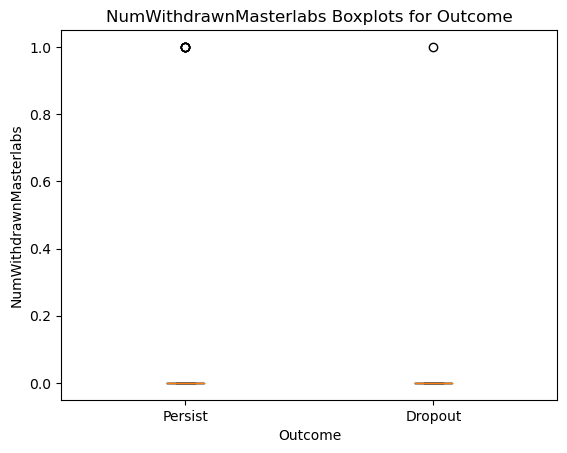

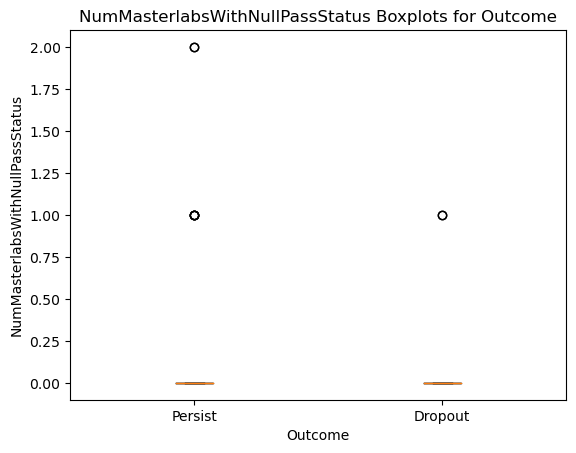

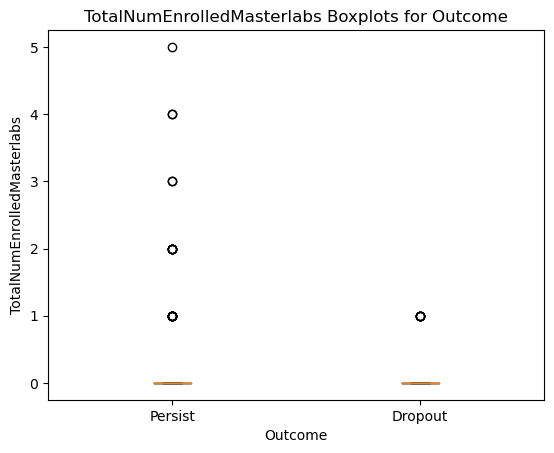

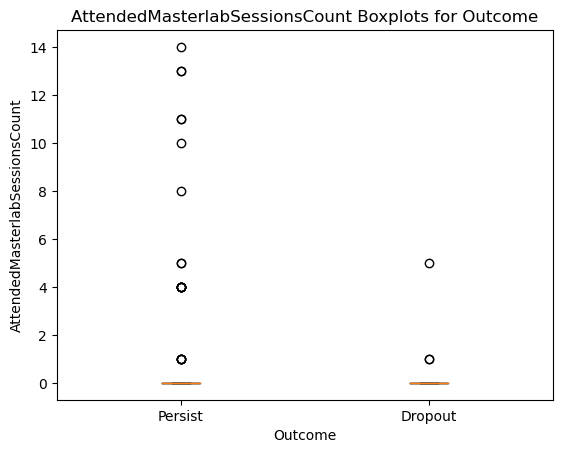

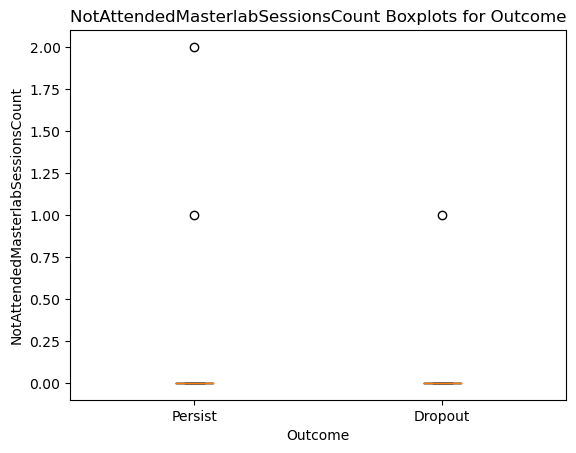

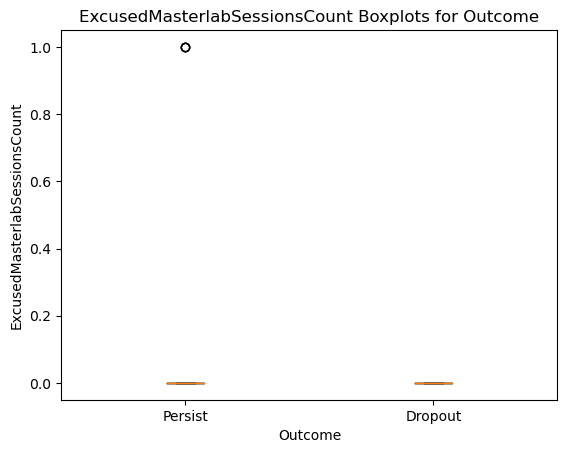

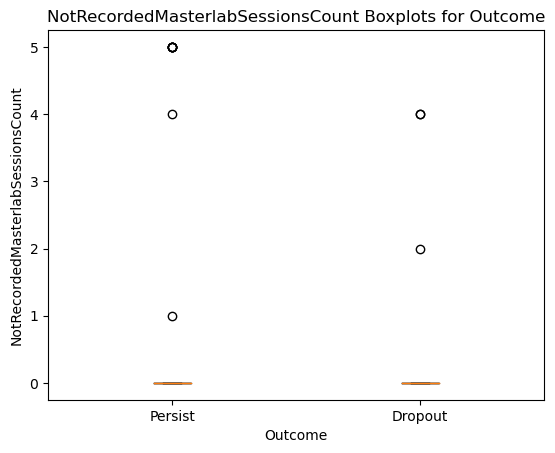

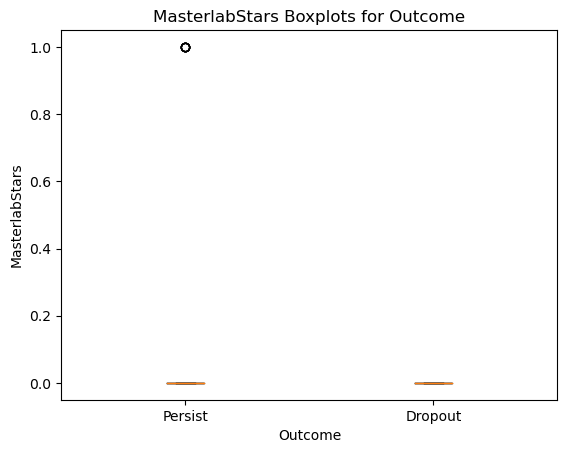

In [30]:
# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in feature_names:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Dropout'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Outcome')
    plt.show()

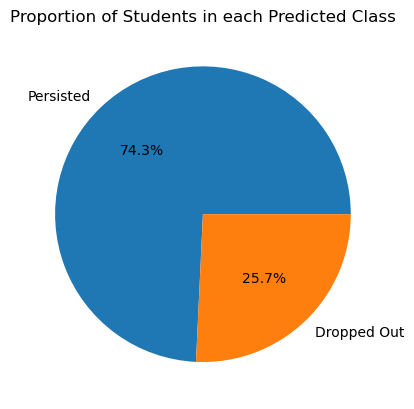

In [5]:
import matplotlib.pyplot as plt

# Count the number of students in each class
class_counts = df['DroppedOut'].value_counts()

# Change the class labels
class_counts.index = ['Persisted', 'Dropped Out']

# Create a pie chart of the counts
class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Students in each Predicted Class')
plt.ylabel('')  # This line removes the y-axis label for the pie chart

# Save the figure
plt.savefig('pie_chart.png', bbox_inches='tight')

plt.show()


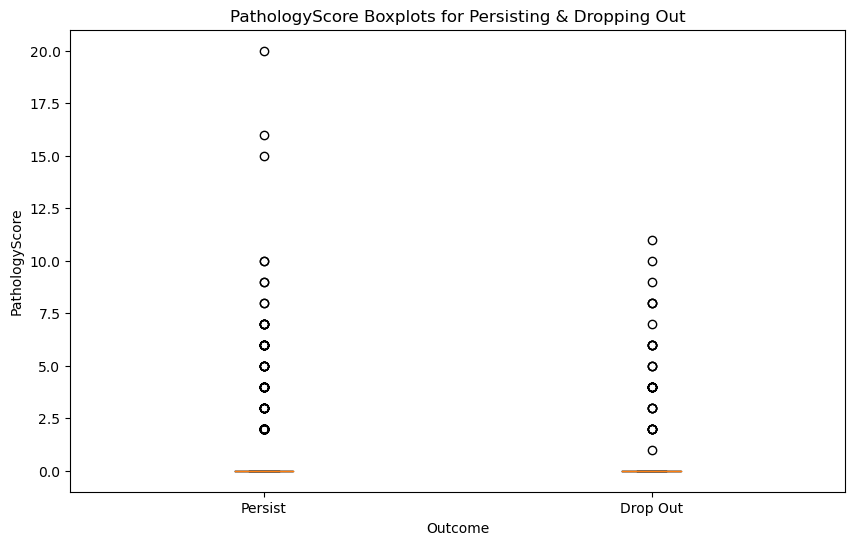

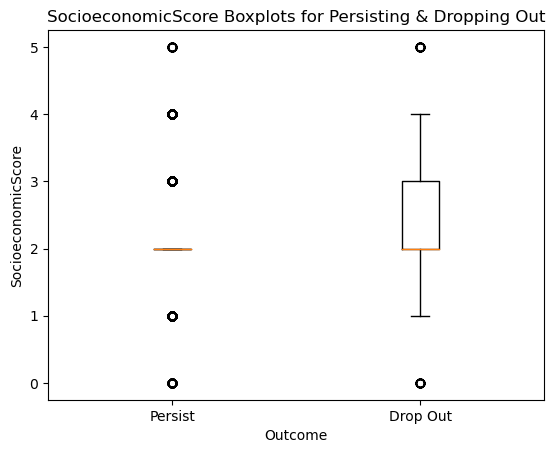

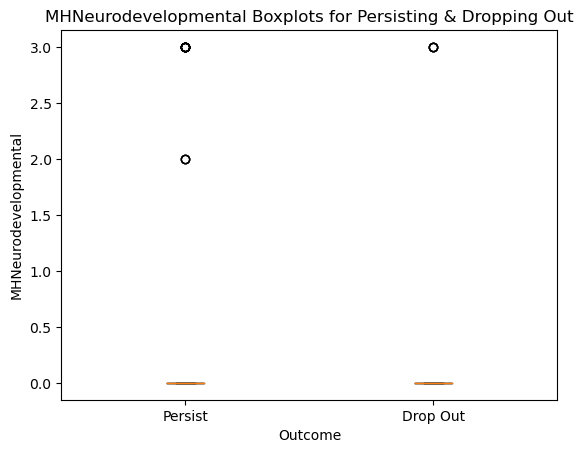

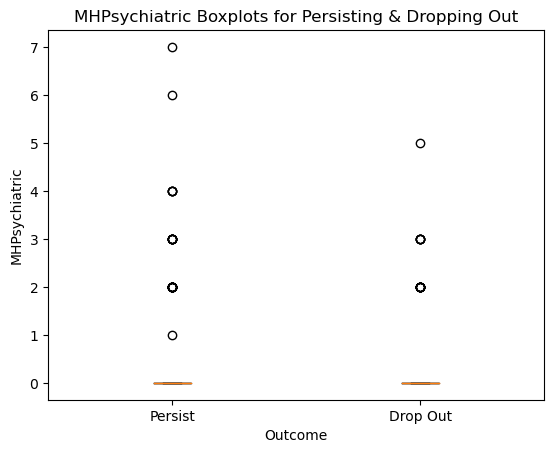

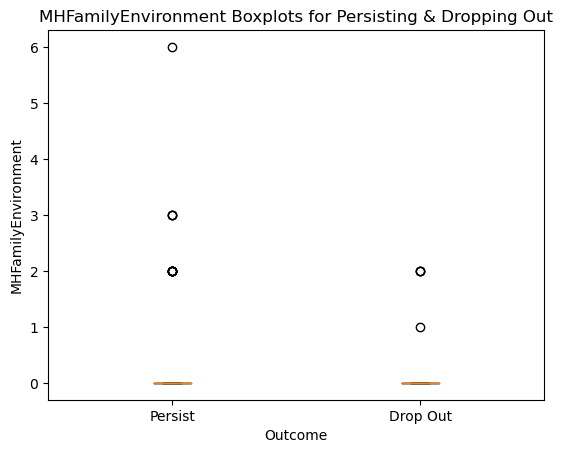

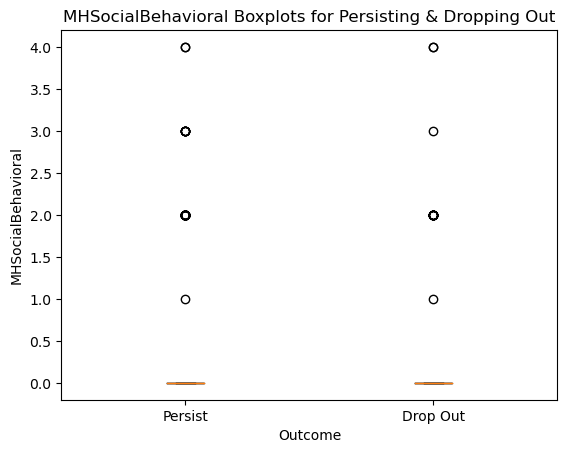

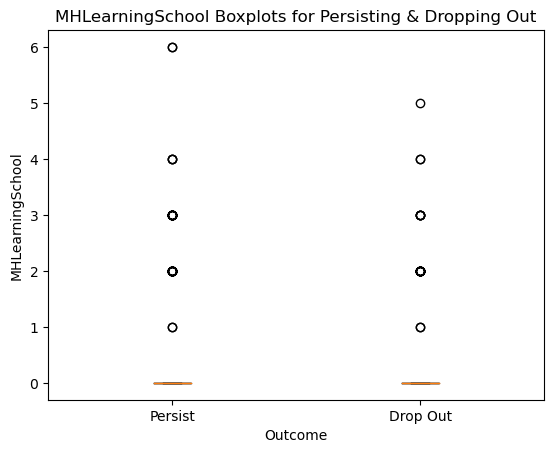

In [248]:
significant_features = ['PathologyScore', 'SocioeconomicScore', 'MHNeurodevelopmental', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']

# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in significant_features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Drop Out'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Persisting & Dropping Out')
    plt.show()

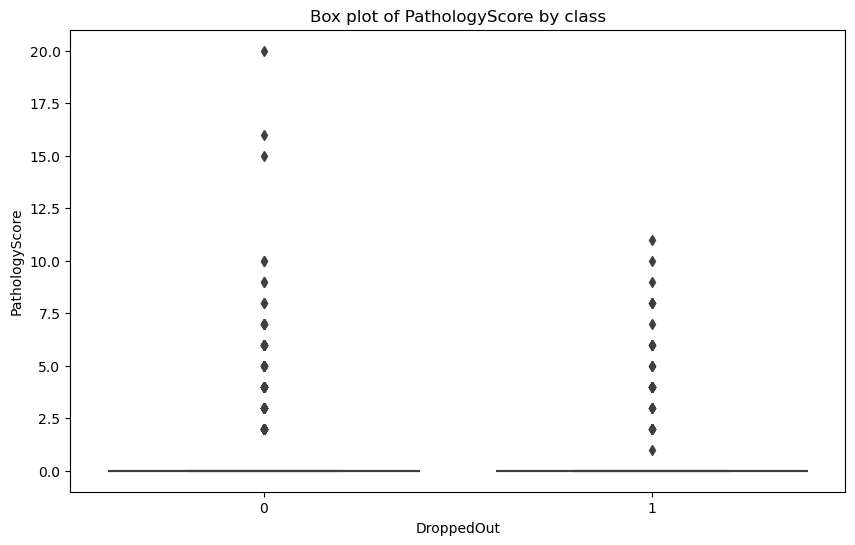

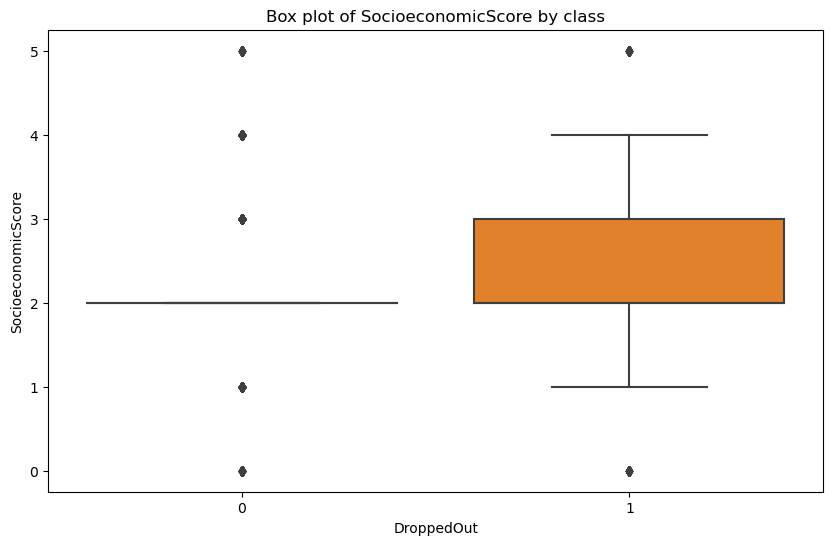

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['PathologyScore', 'SocioeconomicScore']  # replace with your features

# For each feature, we create a separate box plot for each class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DroppedOut', y=feature, data=df)
    plt.title('Box plot of {} by class'.format(feature))
    plt.show()